In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 4.8 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

## Obtaining Dataset from Roboflow

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3K2RNLoipN4PC1wCu2ZN")
project = rf.workspace("cv-9bj6o").project("cv-pizza-images-dataset")
dataset = project.version(12).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.1, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to CV-Pizza-Images-Dataset-12 in yolov8:: 100%|██████████| 4428/4428 [00:00<00:00, 4477.92it/s]


## Editing data.yaml (configuration) File

In [4]:
import yaml

file_path = '/content/CV-Pizza-Images-Dataset-12/data.yaml'
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

data['test'] = '/content/CV-Pizza-Images-Dataset-12/test/images'
data['train'] = '/content/CV-Pizza-Images-Dataset-12/train/images'
data['val'] = '/content/CV-Pizza-Images-Dataset-12/valid/images'

with open(file_path, 'w') as file:
    yaml.dump(data, file)

## Disabling Augmentations Performed by YOLOv8

In [5]:
file_path = '/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/default.yaml'

with open(file_path, 'r') as file:
    config = yaml.safe_load(file)

config['hsv_h'] = 0.0
config['hsv_s'] = 0.0
config['hsv_v'] = 0.0
config['degrees'] = 0.0
config['translate'] = 0.0
config['scale'] = 0.0
config['shear'] = 0.0
config['perspective'] = 0.0
config['flipud'] = 0.0
config['fliplr'] = 0.0
config['mosaic'] = 0.0
config['mixup'] = 0.0
config['copy_paste'] = 0.0

with open(file_path, 'w') as file:
    yaml.dump(config, file)

In [6]:
pip uninstall -y albumentations

Found existing installation: albumentations 1.3.1
Uninstalling albumentations-1.3.1:
  Successfully uninstalled albumentations-1.3.1


## Training Yolov8 on Dataset

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 72.2MB/s]
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, cos_lr=False, crop_fraction=1.0, data=/content/CV-Pizza-Images-Dataset-12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, label_smoothing=0.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

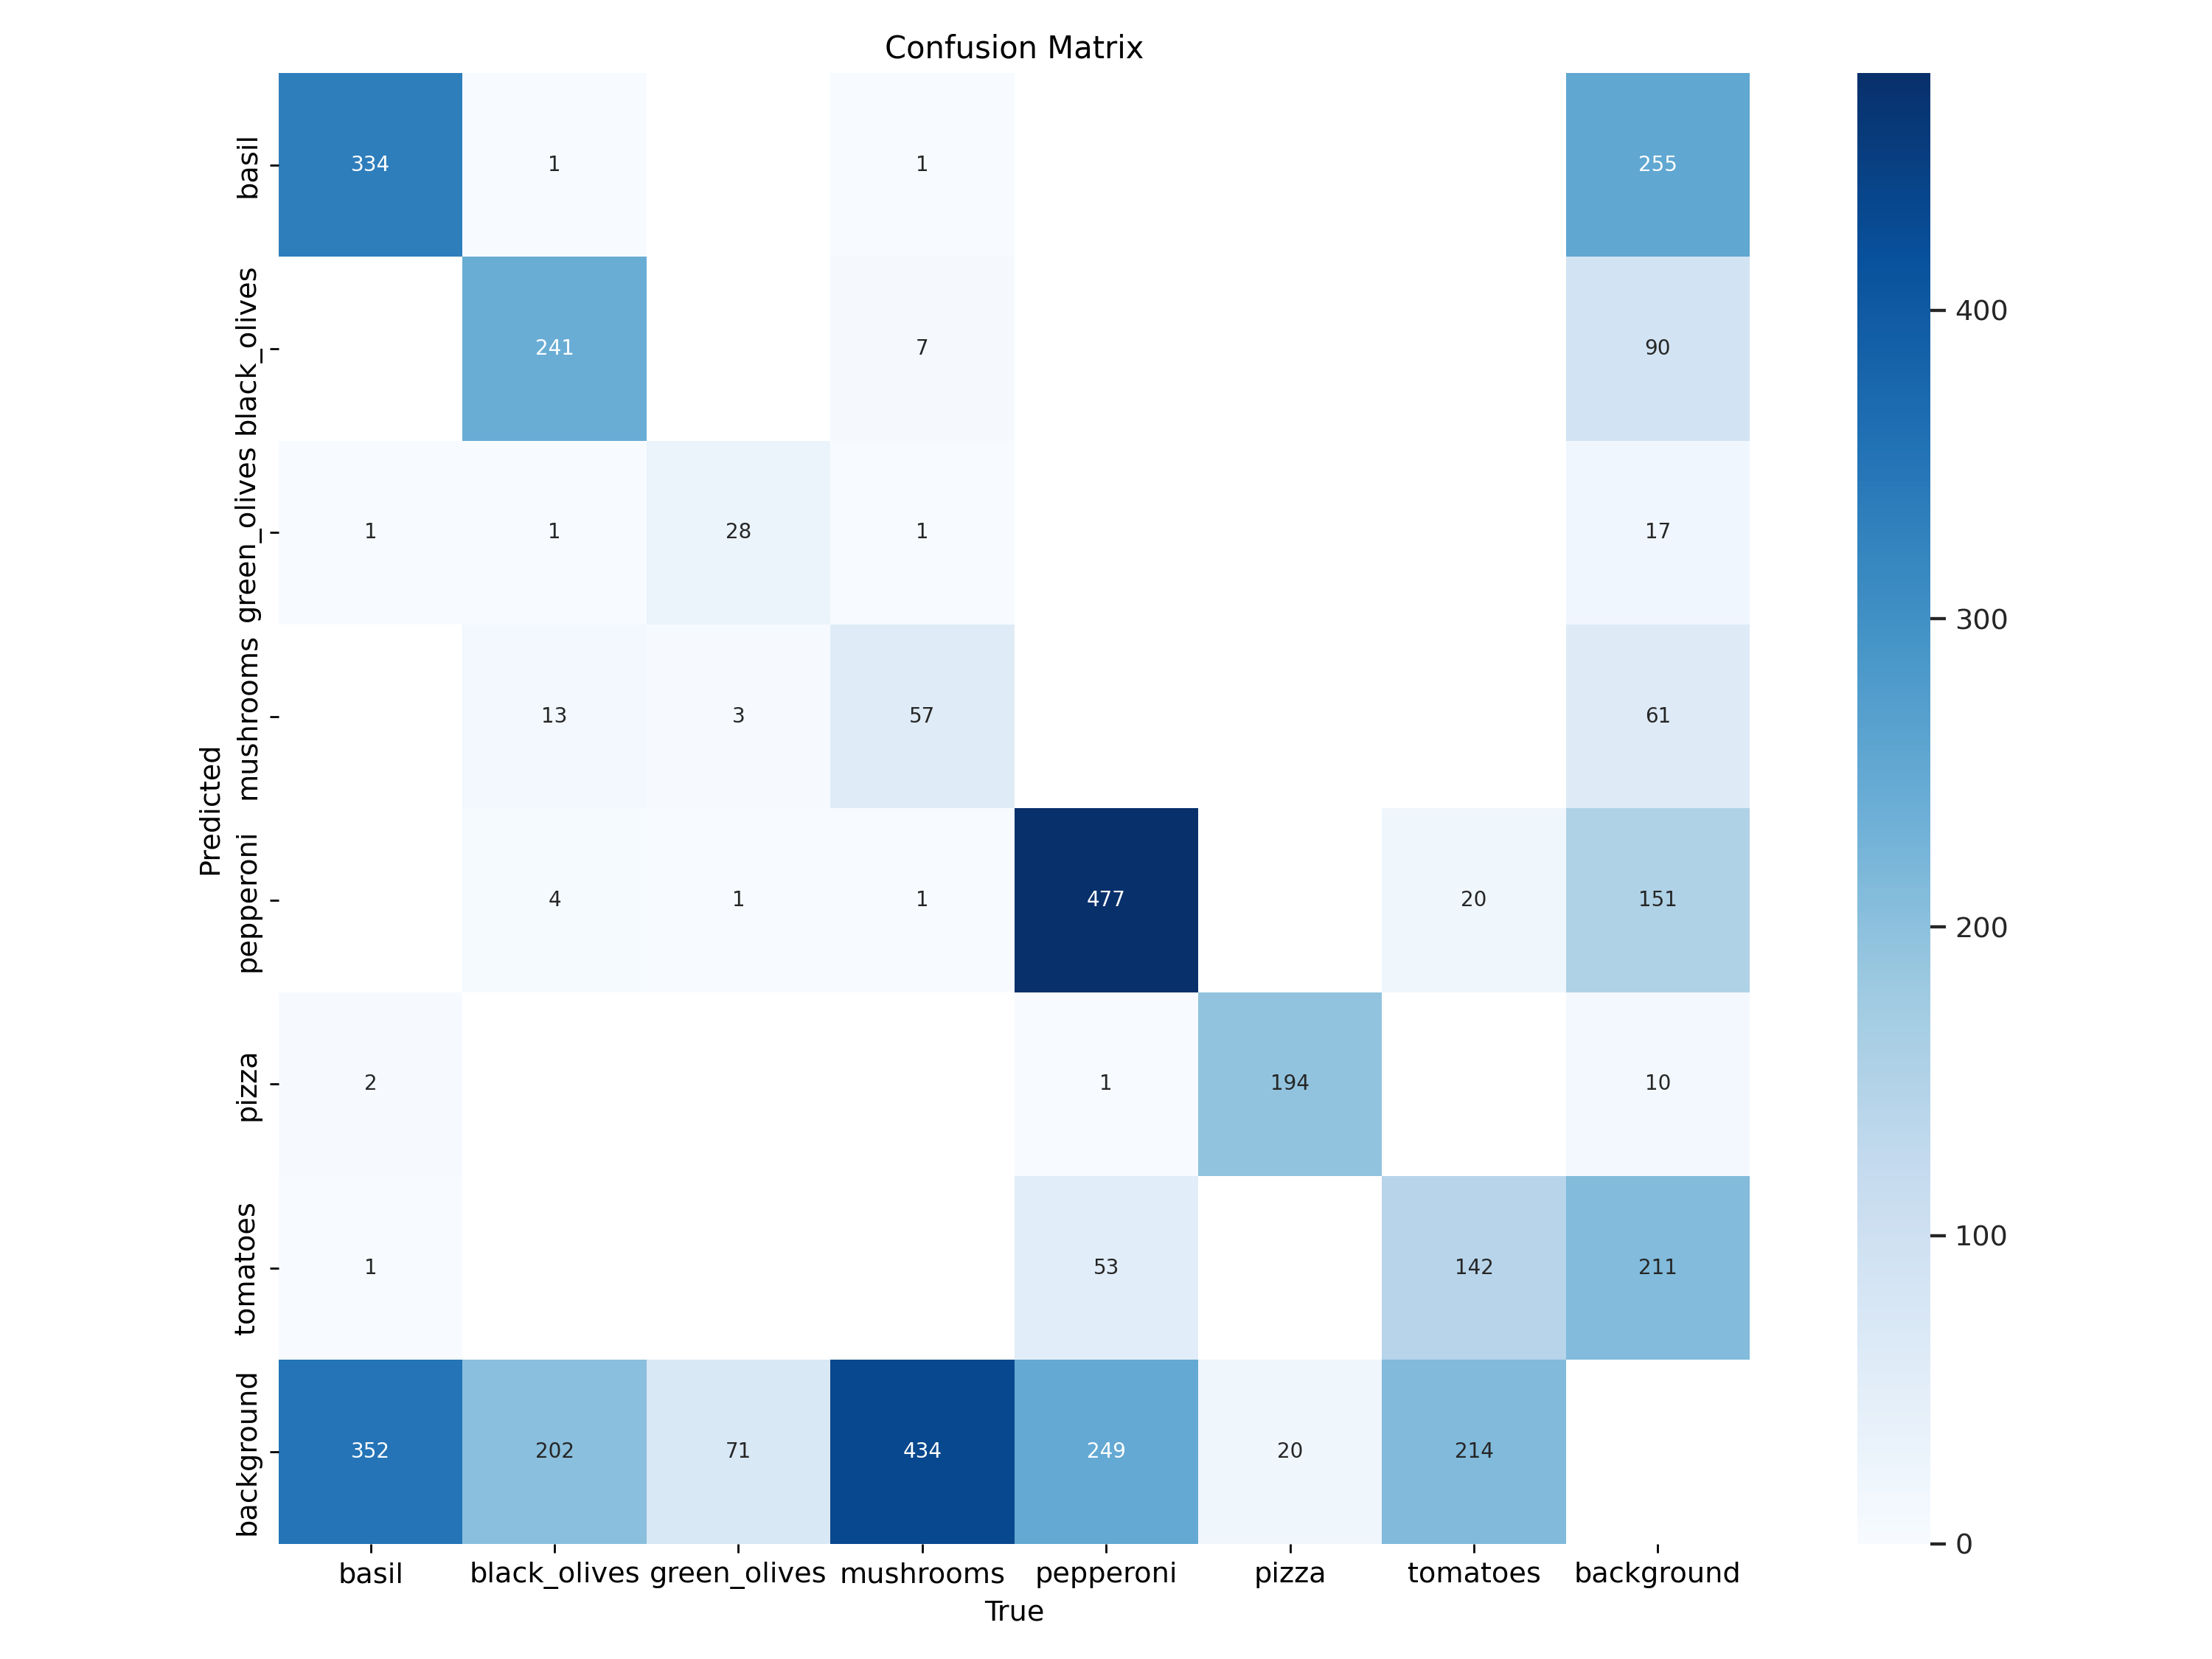

In [8]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

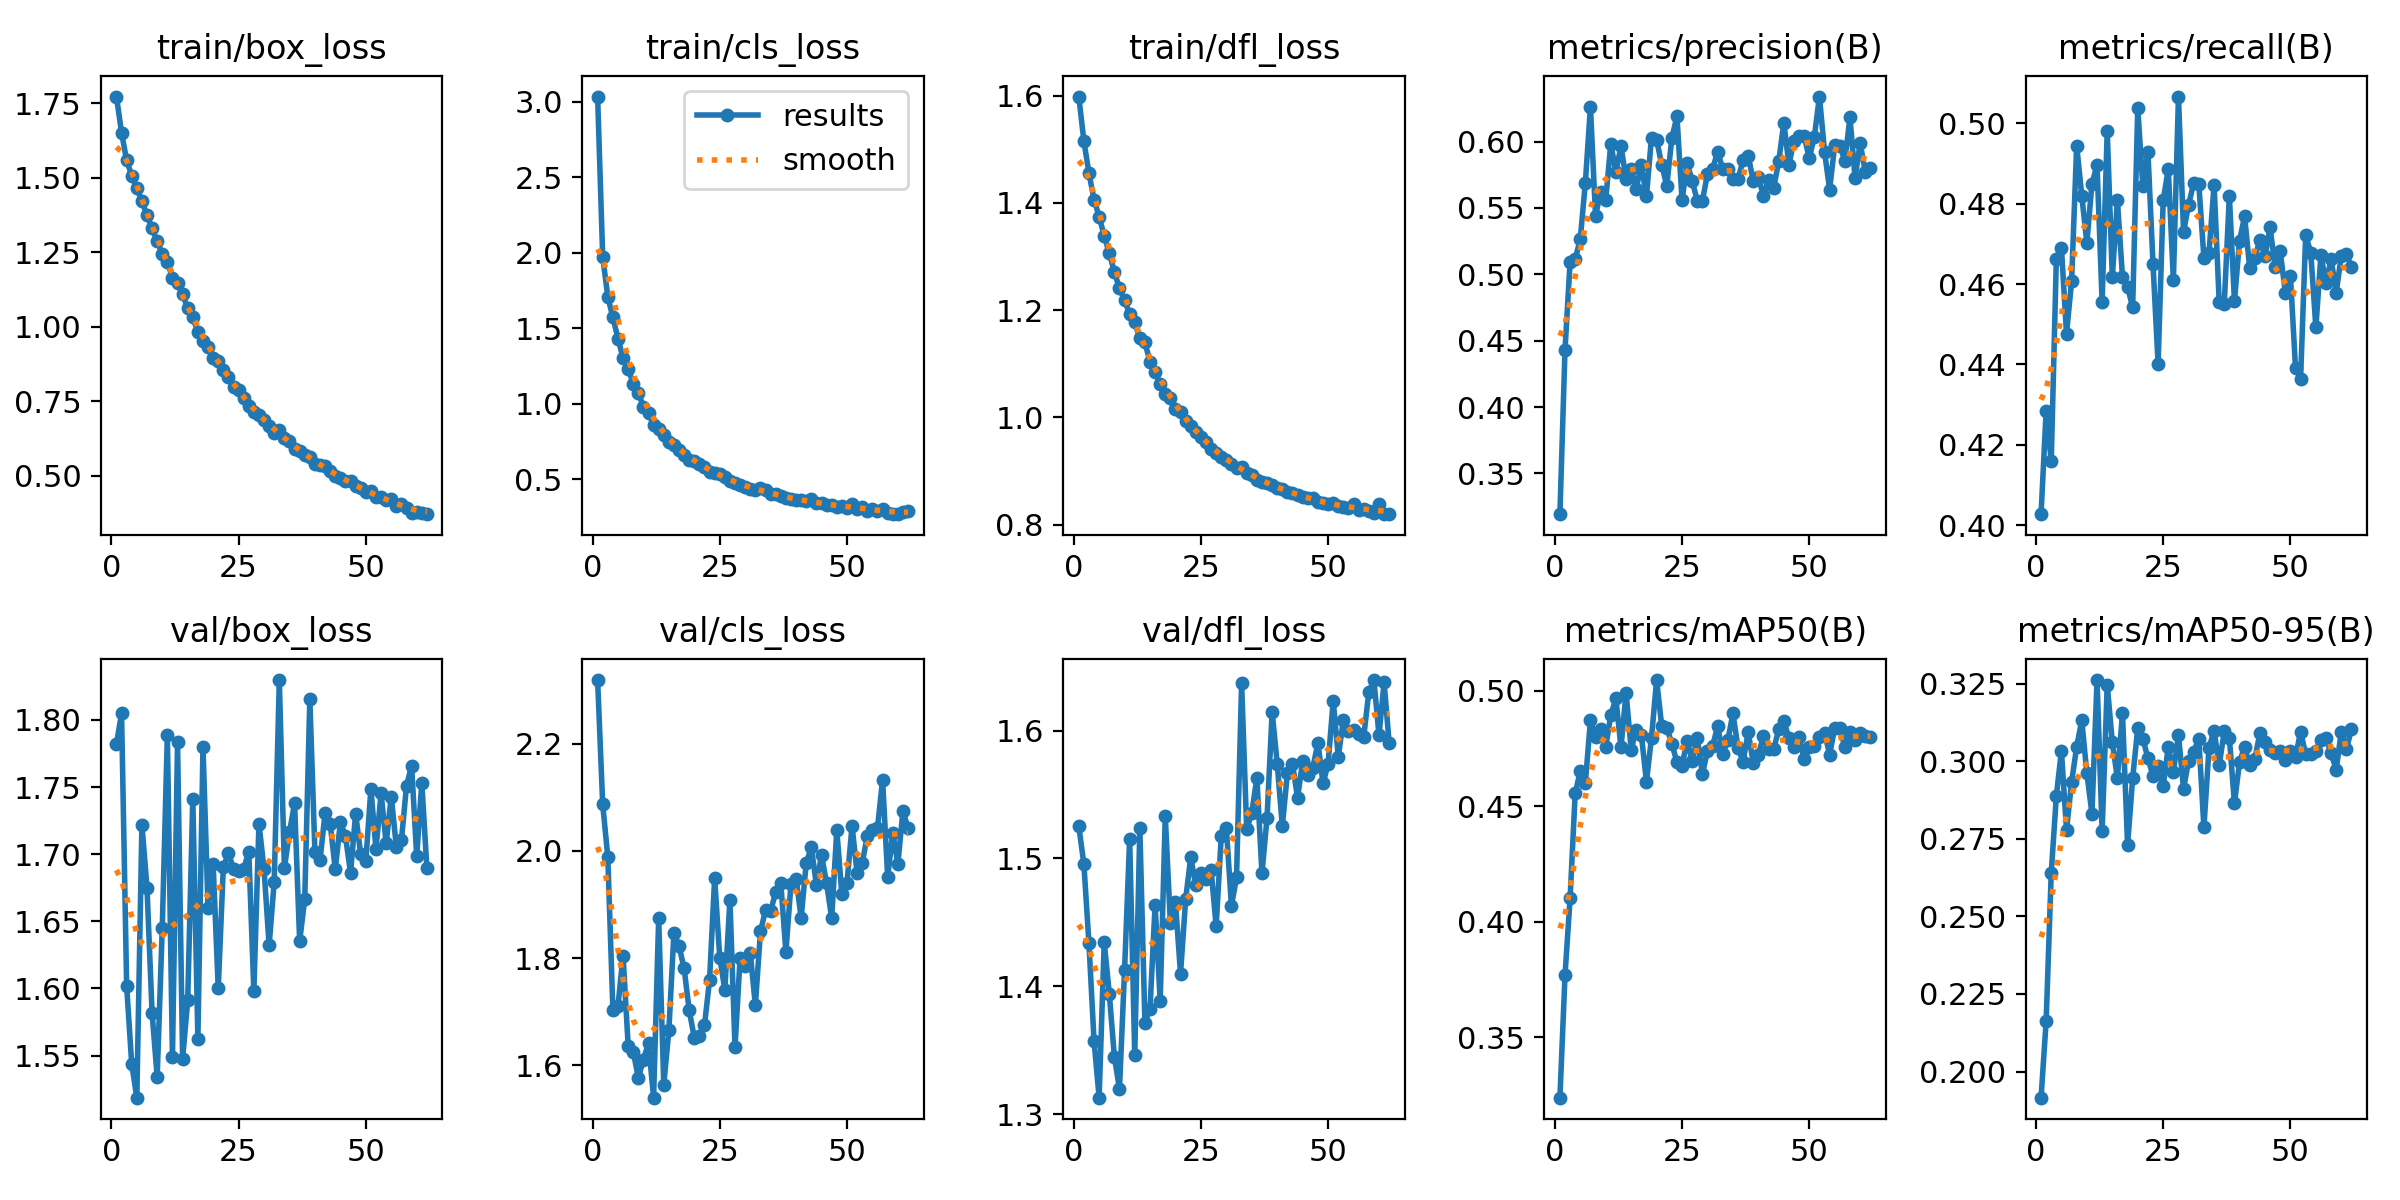

In [9]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/CV-Pizza-Images-Dataset-12/valid/labels.cache... 198 images, 0 backgrounds, 0 corrupt: 100% 198/198 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/CV-Pizza-Images-Dataset-12/valid/images/00219_jpg.rf.c34d5526963bb95feda4ff9051868749.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/CV-Pizza-Images-Dataset-12/valid/images/00597_jpg.rf.9b5764904cf6da66b5dbc589ab1ca6c0.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:16<00:00,  1.25s/it]
                   all        198       3126       0.52       0.52      0.494      0.304
                 basil        198        690      0.466      0.558      0.515       0.26
          black_olives        198        462      0.465      0.606      0.542      0.261
          green_

In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.4 source={dataset.location}/test/images

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/201 /content/CV-Pizza-Images-Dataset-12/test/images/00003_jpg.rf.d55e9ecb31b4c21e38d49522c8b163ab.jpg: 640x640 5 basils, 1 pizza, 10.3ms
image 2/201 /content/CV-Pizza-Images-Dataset-12/test/images/00008_jpg.rf.cbc916a421708b9c013478a5802184f5.jpg: 640x640 4 basils, 1 pizza, 7.4ms
image 3/201 /content/CV-Pizza-Images-Dataset-12/test/images/00011_jpg.rf.ef4450b849bfe4d68c0bb3355865b641.jpg: 640x640 6 mushroomss, 1 pizza, 14 tomatoess, 7.3ms
image 4/201 /content/CV-Pizza-Images-Dataset-12/test/images/00015_jpg.rf.b81734c0b255115ee8df7a69a1d2295e.jpg: 640x640 1 pizza, 7.3ms
image 5/201 /content/CV-Pizza-Images-Dataset-12/test/images/00019_jpg.rf.4bb307f20ee7f077754efaef2315f928.jpg: 640x640 5 basils, 2 black_olivess, 1 mushrooms, 8 pepperonis, 1 pizza, 1 tomatoes, 7.3ms
image 6/201 /content/CV-Pizza-Images-Dataset-12/t